<a href="https://colab.research.google.com/github/afc523/Portfolio/blob/main/Credit_Card_Approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sea
plt.style.use('ggplot')

In [41]:
#File upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clean_dataset.csv to clean_dataset (1).csv
User uploaded file "clean_dataset (1).csv" with length 47107 bytes


In [42]:
df = pd.read_csv('clean_dataset.csv')
df.shape

(690, 16)

In [43]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [44]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [45]:
df = df[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
         # 'Industry', 'Ethnicity',
         'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense',
         # 'Citizen',
         'ZipCode', 'Income', 'Approved'
    ]].copy()

In [46]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [47]:
df.shape

(690, 13)

In [48]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [49]:
# if there is a no value
df.isna()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
# Number of missing values in each column
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [51]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Length: 690, dtype: bool

In [52]:
df.loc[df.duplicated()]

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved


In [53]:
df.duplicated(subset=['Gender','Age','Debt','Married','BankCustomer','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','ZipCode','Income','Approved']).sum()

0

In [54]:
df

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,0.04,0,0,0,0,280,750,0


In [55]:
df['Income'].value_counts()

0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: Income, Length: 240, dtype: int64

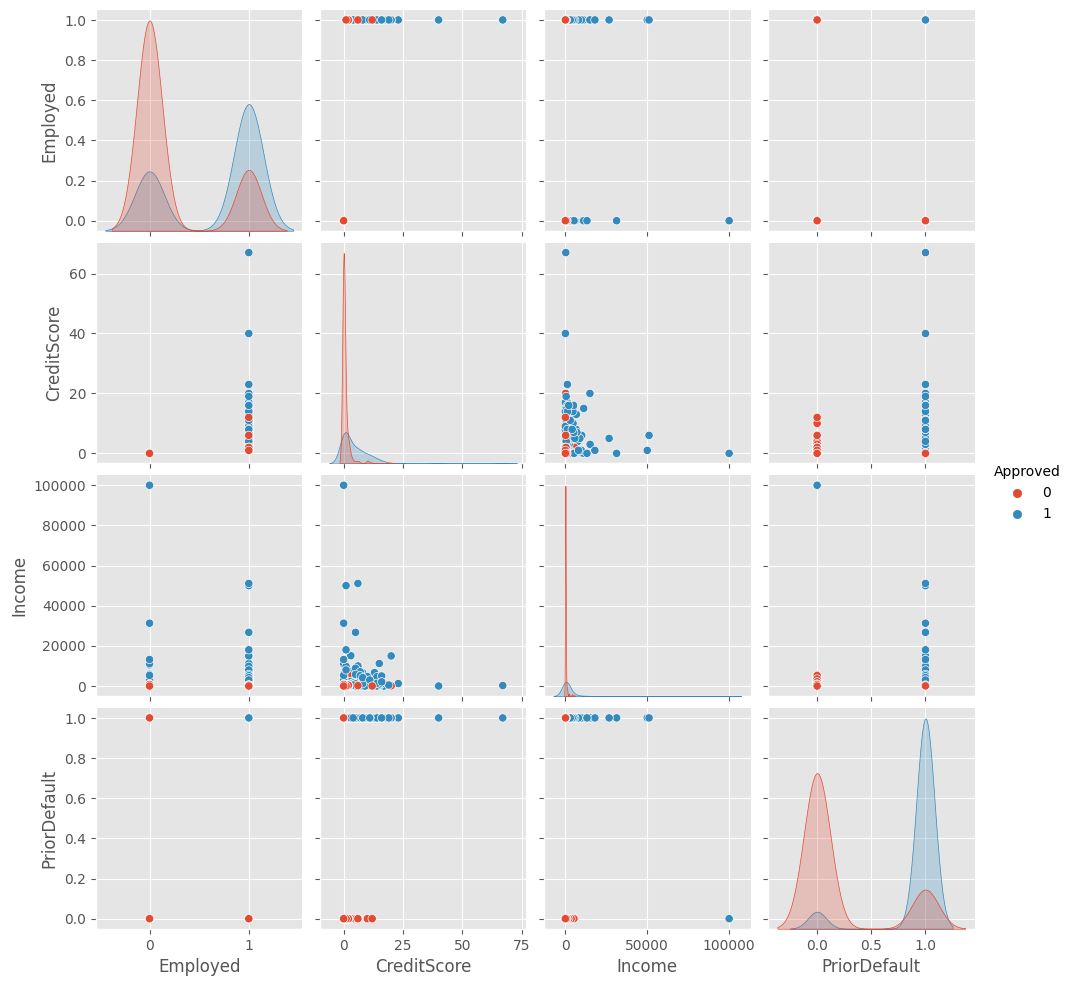

In [69]:
sea.pairplot(df, vars=['Employed','CreditScore','Income','PriorDefault'],
             hue='Approved')
plt.show()

In [73]:
# Correlation and drop any no values
df_corr = df[['Employed','CreditScore','Income','PriorDefault','Approved','ZipCode','YearsEmployed']].dropna() \
.corr()
df_corr

,Employed,CreditScore,Income,PriorDefault,Approved,ZipCode,YearsEmployed
Employed,1.000000,0.571498,0.077652,0.432032,0.458301,-0.044834,0.222982
CreditScore,0.571498,1.000000,0.063692,0.379532,0.406410,-0.112816,0.322330
Income,0.077652,0.063692,1.000000,0.090012,0.175657,0.059234,0.051345
PriorDefault,0.432032,0.379532,0.090012,1.000000,0.720407,-0.055010,0.345689
Approved,0.458301,0.406410,0.175657,0.720407,1.000000,-0.099598,0.322475
ZipCode,-0.044834,-0.112816,0.059234,-0.055010,-0.099598,1.000000,-0.070495
YearsEmployed,0.222982,0.322330,0.051345,0.345689,0.322475,-0.070495,1.000000


In [56]:
y = df ['Approved']
y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 690, dtype: int64

In [57]:
x = df. drop('Approved', axis=1)
x

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,260,0
686,0,22.67,0.750,1,1,2.00,0,1,2,1,200,394
687,0,25.25,13.500,0,0,2.00,0,1,1,1,200,1
688,1,17.92,0.205,1,1,0.04,0,0,0,0,280,750


In [58]:
# split data sets in to train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [59]:
# Linear Regression model building: Now we have 4 data sets
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
# We trained the model and now will apply it
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [62]:
y_lr_test_pred

array([ 9.31002284e-01,  8.63263830e-01,  6.26381166e-01,  8.46344835e-01,
        7.78541807e-01,  6.10191107e-02,  9.43125341e-01,  1.59937464e-01,
        8.82951312e-01,  9.82930265e-01,  9.26865261e-01,  8.44024799e-01,
        1.16016043e-02,  1.96477711e-02,  6.75688236e-01,  1.87783830e-02,
        9.04975335e-01,  1.07180563e+00,  8.64579217e-01,  9.13661668e-01,
        8.74255307e-01,  7.43821584e-02, -5.66992609e-02,  7.97434806e-01,
        6.95514489e-01,  6.88686510e-01,  8.66995698e-01,  3.58420827e-02,
        8.47431418e-01,  8.86163359e-01,  9.44235225e-01,  3.32029242e-02,
        9.18161977e-01,  9.01918471e-01,  1.41641970e-02,  8.13670518e-01,
        2.37843283e-01,  8.13816618e-01,  5.88473040e-02,  8.81800050e-01,
        6.29496796e-01,  7.80463231e-01,  5.67972042e-01,  2.35666572e-01,
       -3.39004999e-02,  6.19220860e-01,  1.34485449e-02,  8.14922991e-01,
        5.07271580e-02,  6.62017232e-02,  6.65063410e-01,  9.17853973e-01,
        3.20493647e-02,  

In [63]:
# Let's compare the predicted values with the actual values
#Model performance
#Comparing y_train with y_lr_train_pred
#Scatter plot
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [64]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.097056,0.607444,0.136763,0.443478


Text(0, 0.5, 'Predicted Approvals')

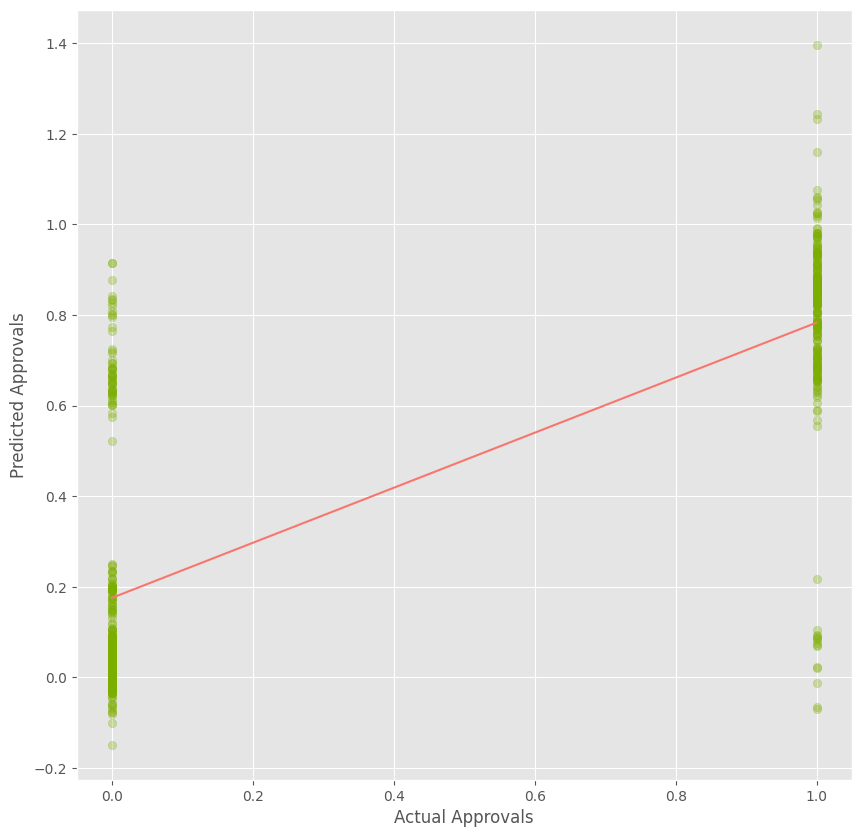

In [66]:
# Data Visualisation
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.xlabel('Actual Approvals')
plt.ylabel('Predicted Approvals')

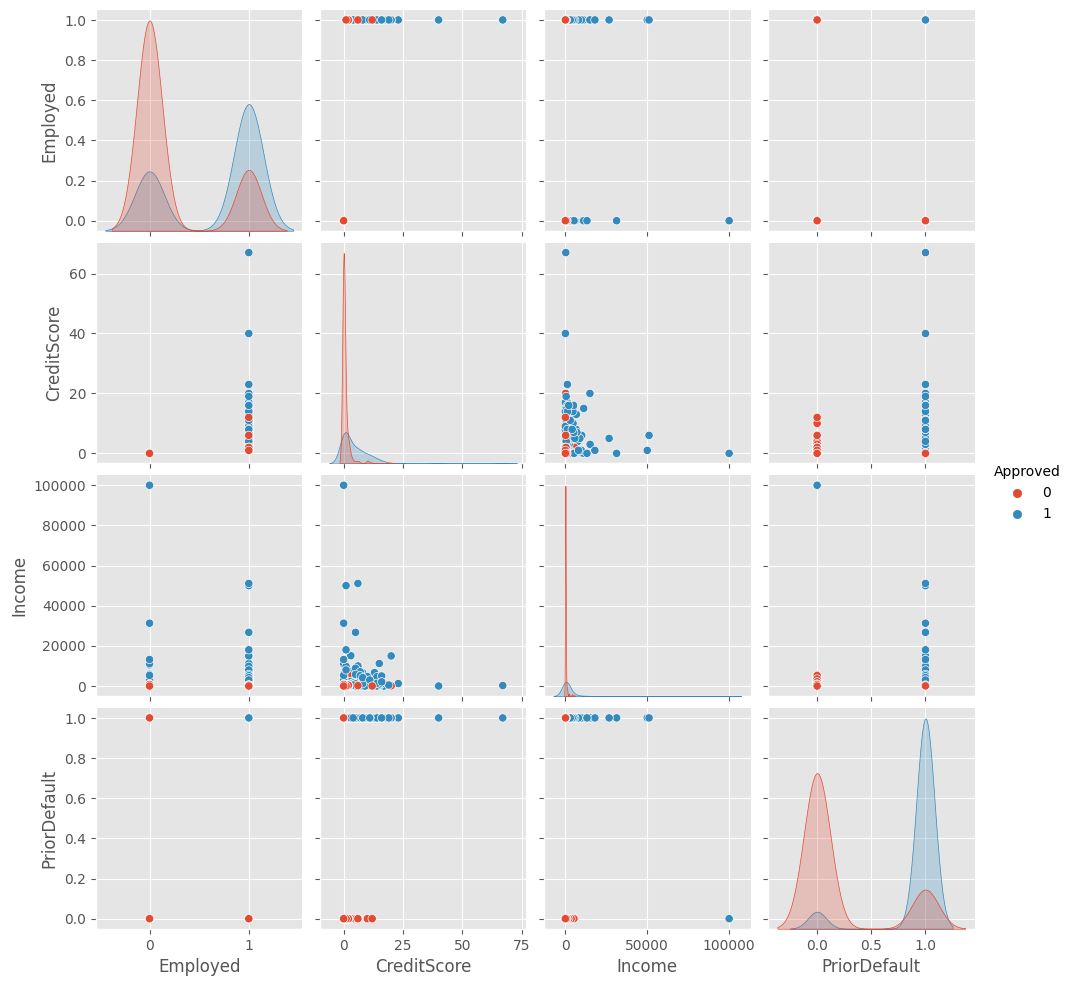

In [71]:
sea.pairplot(df, vars=['Employed','CreditScore','Income','PriorDefault'],
             hue='Approved')
plt.show()